<a href="https://colab.research.google.com/github/ciwi0212/Kecerdasan-Buatan-23/blob/main/2309106005_Cellia_Auzia_Nugraha_POSTTEST4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**POSTTEST 2**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Tampilkan rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka.
df = pd.read_csv("weather_classification_data.csv")
df_desc = df.describe(percentiles=[0.25, 0.5, 0.75]).T
print(df_desc)

                        count         mean        std     min    25%      50%  \
Temperature           13200.0    19.127576  17.386327  -25.00    4.0    21.00   
Humidity              13200.0    68.710833  20.194248   20.00   57.0    70.00   
Wind Speed            13200.0     9.832197   6.908704    0.00    5.0     9.00   
Precipitation (%)     13200.0    53.644394  31.946541    0.00   19.0    58.00   
Atmospheric Pressure  13200.0  1005.827896  37.199589  800.12  994.8  1007.65   
UV Index              13200.0     4.005758   3.856600    0.00    1.0     3.00   
Visibility (km)       13200.0     5.462917   3.371499    0.00    3.0     5.00   

                            75%      max  
Temperature             31.0000   109.00  
Humidity                84.0000   109.00  
Wind Speed              13.5000    48.50  
Precipitation (%)       82.0000   109.00  
Atmospheric Pressure  1016.7725  1199.21  
UV Index                 7.0000    14.00  
Visibility (km)          7.5000    20.00  


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data ini merepresentasikan kondisi cuaca dengan variasi cukup besar, namun ada beberapa nilai tidak realistis (temperature 109°C, humidity > 100%, precipitation > 100%, dan atmospheric pressure yang memiliki nilai ekstrim di 1.199 hPa meskipun memiliki rentang yang wajar di 994.8 – 1016.8 hPa ). Hal ini perlu diperiksa lebih lanjut sebagai outlier atau kesalahan input.

In [7]:
# Tampilkan 10 record pertama dari dataset dengan attribute bertipe angka.
df_numerik = df.select_dtypes(include=["number"])
print(df_numerik.head(10))

   Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0         14.0        73         9.5               82.0               1010.82   
1         39.0        96         8.5               71.0               1011.43   
2         30.0        64         7.0               16.0               1018.72   
3         38.0        83         1.5               82.0               1026.25   
4         27.0        74        17.0               66.0                990.67   
5         32.0        55         3.5               26.0               1010.03   
6         -2.0        97         8.0               86.0                990.87   
7          3.0        85         6.0               96.0                984.46   
8          3.0        83         6.0               66.0                999.44   
9         28.0        74         8.5              107.0               1012.13   

   UV Index  Visibility (km)  
0         2              3.5  
1         7             10.0  
2         5    

Sepuluh record pertama menunjukkan data numerik seperti Temperature, Humidity, Wind Speed, Precipitation (%), Atmospheric Pressure, UV Index, Visibility (km).

In [8]:
# Tampilkan informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka.

jmlh_record = df.shape[0]
jmlh_attribut = df.shape[1]
nama_attribut = df.columns.tolist()
jmlh_attribut_num = df_numerik.shape[1]

print("Jumlah record:", jmlh_record)
print("Jumlah attribute:", jmlh_attribut)
print("Nama attribute:", nama_attribut)
print("Jumlah attribute numerik:", jmlh_attribut_num)

Jumlah record: 13200
Jumlah attribute: 11
Nama attribute: ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility (km)', 'Location', 'Weather Type']
Jumlah attribute numerik: 7


Dataset memiliki 13.200 record, 11 attribut, 7 attribut numerik, dan nama-nama attribut seperti Temperature, Humidity, Wind Speed, Precipitation (%), Cloud Cover, Atmospheric Pressure, UV Index, Season, Visibility (km), Location, dan Weather Type

In [9]:
# Tampilkan jumlah label dari semua attribute yang bernilai object (contoh : Jenis Kelamin, Agama).

print(df["Cloud Cover"].value_counts())
print(df["Season"].value_counts())
print(df["Location"].value_counts())
print(df["Weather Type"].value_counts())

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64
Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64
Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64
Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


Dapat dilihat bahwa:
*   'Cloud Cover' memiliki 4 label (overcast, partly  cloudy, clear, cloudy)
*   'Season' memiliki 4 label (winter, spring, autumn, summer)
*   'Location' memiliki 3 label (inland, mountain, coastal)
*   'Weather Type' memiliki 4 label (rainy, cloudy, sunny, snowy)



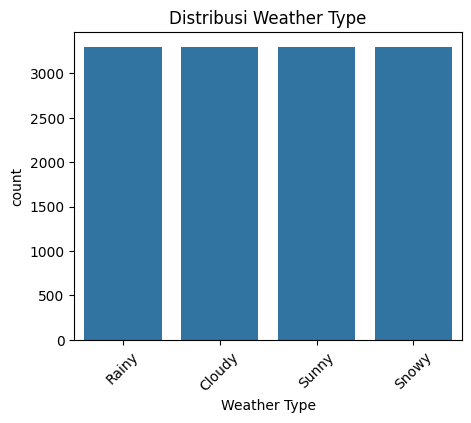

In [10]:
# Visualisasikan dataset dengan salah satu grafik. Pilih grafik yang paling cocok untuk memvisualisasikan data tersebut.

plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Weather Type", order=df["Weather Type"].value_counts().index)
plt.title("Distribusi Weather Type")
plt.xticks(rotation=45)
plt.show()

Berdasarkan gambar grafik diatas, terdapat empat kategori cuaca utama dalam dataset, yaitu Rainy, Cloudy, Sunny, dan Snowy, dengan jumlah kemunculan yang relatif seimbang, masing-masing sekitar 3.300 kali. Hal ini menunjukkan bahwa tidak ada satu jenis cuaca yang terlalu dominan sehingga data cuaca yang digunakan cukup terdistribusi merata dan representatif untuk analisis lebih lanjut.

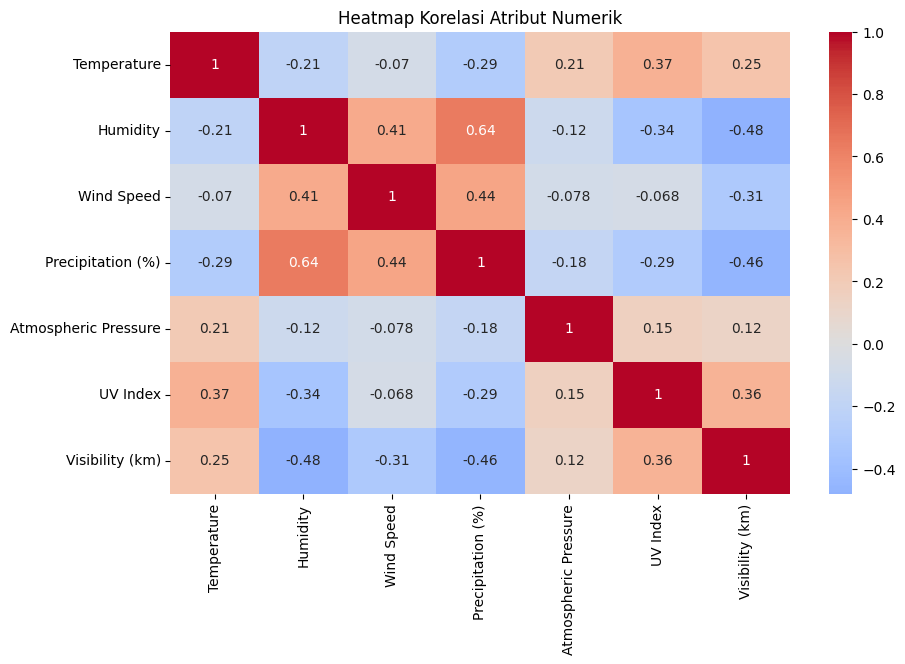

In [11]:
# Tampilkan korelasi dataset menggunakan heatmap
plt.figure(figsize=(10,6))
corr_matrix = df_numerik.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, center=0)
plt.title("Heatmap Korelasi Atribut Numerik")
plt.show()

Berdasarkan heatmap korelasi, dapat disimpulkan bahwa hubungan paling kuat terlihat pada humidity dan precipitation yang berkorelasi positif tinggi, artinya semakin lembab udara maka semakin besar kemungkinan hujan. Sebaliknya, humidity berkorelasi negatif dengan visibility, menunjukkan bahwa humidity tinggi cenderung mengurangi jarak pandang. Wind speed juga memiliki hubungan sedang dengan humidity dan precipitation, sedangkan UV index lebih tinggi saat suhu naik dan kondisi cerah (korelasi positif dengan temperature dan visibility, negatif dengan humidity dan precipitation). Sementara itu, atmospheric pressure tidak menunjukkan hubungan yang signifikan dengan variabel lain sehingga cenderung independen.

**POSTTEST 3**

In [12]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

PENANGANAN MISSING VALUE

Mencari missing value

In [13]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


**Kesimpulan Penanganan Missing Value**

Hasil pengecekan menunjukkan bahwa tidak ada nilai yang hilang (missing value) dalam dataset. Semua data lengkap dan siap untuk tahap pemrosesan selanjutnya.

Cek dan Hapus Duplikasi

In [14]:
print("Jumlah duplikat:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Setelah dihapus duplikat:", df.duplicated().sum())

Jumlah duplikat: 0
Setelah dihapus duplikat: 0


**Kesimpulan Cek dan Hapus Duplikasi**

Pengecekan data menunjukkan bahwa tidak ada baris data yang terduplikasi dalam dataset. Oleh karena itu, tidak ada tindakan penghapusan duplikat yang diperlukan.

Deteksi dan Menangani Outlier

In [15]:
outlier_summary = {}

num_cols = df.select_dtypes(include='number').columns
print("\nKolom numerik:", num_cols.tolist())


for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = len(outliers)

print("Jumlah outlier per kolom:")
for k, v in outlier_summary.items():
    print(f"{k}: {v}")


Kolom numerik: ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
Jumlah outlier per kolom:
Temperature: 92
Humidity: 0
Wind Speed: 404
Precipitation (%): 0
Atmospheric Pressure: 927
UV Index: 0
Visibility (km): 383


In [16]:
cols_with_outlier = ['Temperature', 'Wind Speed', 'Atmospheric Pressure', 'Visibility (km)']

for col in cols_with_outlier:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("Outlier berhasil dihapus dari kolom:", cols_with_outlier)
print("Ukuran dataset setelah pembersihan:", df.shape)

Outlier berhasil dihapus dari kolom: ['Temperature', 'Wind Speed', 'Atmospheric Pressure', 'Visibility (km)']
Ukuran dataset setelah pembersihan: (11689, 11)


**Kesimpulan Deteksi dan Menangani Outlier**

Deteksi outlier menggunakan metode IQR (Interquartile Range) menunjukkan adanya outlier pada kolom 'Temperature', 'Wind Speed', 'Atmospheric Pressure', dan 'Visibility (km)'.

Outlier kemudian dihapus dari kolom-kolom tersebut untuk memastikan bahwa nilai-nilai ekstrim tidak mempengaruhi hasil analisis atau kinerja model machine learning secara negatif. Penghapusan outlier mengurangi ukuran dataset dari 13200 menjadi 11689 record.

NORMALISASI

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
0,0.400000,0.595506,0.365385,0.752294,0.555375,0.142857,0.250000
1,0.663158,0.853933,0.326923,0.651376,0.562442,0.500000,0.714286
2,0.568421,0.494382,0.269231,0.146789,0.646895,0.357143,0.392857
3,0.652632,0.707865,0.057692,0.752294,0.734129,0.500000,0.071429
4,0.536842,0.606742,0.653846,0.605505,0.321942,0.071429,0.178571


**Kesimpulan Normalisasi**

Pada tahap normalisasi, nilai pada kolom numerik diubah ke dalam rentang 0 hingga 1 menggunakan MinMaxScaler. Tujuannya adalah untuk menyamakan skala data sehingga tidak ada satu fitur pun yang mendominasi proses pelatihan model machine learning karena nilainya lebih besar.

Encoding Kolom Kategorikal

In [18]:
print("Ukuran dataset awal:", df.shape)
display(df.head(10))

cat_cols = df.select_dtypes(include='object').columns
print("\nKolom kategorikal yang akan di-encode:")
print(cat_cols.tolist())

df_cat_before = df[cat_cols].copy()
print("\n===== Data Kategorikal Sebelum Encoding =====")
display(df_cat_before.head(10))

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[cat_cols])

encoded_cols = encoder.get_feature_names_out(cat_cols)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols)

df_encoded = pd.concat([df.drop(columns=cat_cols).reset_index(drop=True),
                        encoded_df.reset_index(drop=True)], axis=1)

print("\n===== Data Setelah Encoding =====")
display(df_encoded.head(10))

print("\nJumlah kolom sebelum encoding:", len(df.columns))
print("Jumlah kolom sesudah encoding :", len(df_encoded.columns))


Ukuran dataset awal: (11689, 11)


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,0.400000,0.595506,0.365385,0.752294,partly cloudy,0.555375,0.142857,Winter,0.250000,inland,Rainy
1,0.663158,0.853933,0.326923,0.651376,partly cloudy,0.562442,0.500000,Spring,0.714286,inland,Cloudy
2,0.568421,0.494382,0.269231,0.146789,clear,0.646895,0.357143,Spring,0.392857,mountain,Sunny
3,0.652632,0.707865,0.057692,0.752294,clear,0.734129,0.500000,Spring,0.071429,coastal,Sunny
4,0.536842,0.606742,0.653846,0.605505,overcast,0.321942,0.071429,Winter,0.178571,mountain,Rainy
5,0.589474,0.393258,0.134615,0.238532,overcast,0.546223,0.142857,Summer,0.357143,inland,Cloudy
6,0.231579,0.865169,0.307692,0.788991,overcast,0.324259,0.071429,Winter,0.285714,inland,Snowy
7,0.284211,0.730337,0.230769,0.880734,partly cloudy,0.250000,0.071429,Winter,0.250000,inland,Snowy
8,0.284211,0.707865,0.230769,0.605505,overcast,0.423540,0.000000,Winter,0.071429,mountain,Snowy
9,0.547368,0.606742,0.326923,0.981651,clear,0.570551,0.571429,Winter,0.535714,coastal,Sunny



Kolom kategorikal yang akan di-encode:
['Cloud Cover', 'Season', 'Location', 'Weather Type']

===== Data Kategorikal Sebelum Encoding =====


,Cloud Cover,Season,Location,Weather Type
0,partly cloudy,Winter,inland,Rainy
1,partly cloudy,Spring,inland,Cloudy
2,clear,Spring,mountain,Sunny
3,clear,Spring,coastal,Sunny
4,overcast,Winter,mountain,Rainy
5,overcast,Summer,inland,Cloudy
6,overcast,Winter,inland,Snowy
7,partly cloudy,Winter,inland,Snowy
8,overcast,Winter,mountain,Snowy
9,clear,Winter,coastal,Sunny



===== Data Setelah Encoding =====


,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,...,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
0,0.400000,0.595506,0.365385,0.752294,0.555375,0.142857,0.250000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.663158,0.853933,0.326923,0.651376,0.562442,0.500000,0.714286,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.568421,0.494382,0.269231,0.146789,0.646895,0.357143,0.392857,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.652632,0.707865,0.057692,0.752294,0.734129,0.500000,0.071429,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.536842,0.606742,0.653846,0.605505,0.321942,0.071429,0.178571,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0.589474,0.393258,0.134615,0.238532,0.546223,0.142857,0.357143,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,0.231579,0.865169,0.307692,0.788991,0.324259,0.071429,0.285714,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,0.284211,0.730337,0.230769,0.880734,0.250000,0.071429,0.250000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,0.284211,0.707865,0.230769,0.605505,0.423540,0.000000,0.071429,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.547368,0.606742,0.326923,0.981651,0.570551,0.571429,0.535714,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0



Jumlah kolom sebelum encoding: 11
Jumlah kolom sesudah encoding : 22


**Kesimpulan Encoding Kolom Kategorikal**

Pada tahap ini, kolom kategorikal seperti 'Cloud Cover', 'Season', 'Location', dan 'Weather Type' diubah menjadi format numerik menggunakan One-Hot Encoding.

Tujuannya adalah agar model machine learning dapat memproses data ini. Setiap kategori unik dalam kolom kategorikal diubah menjadi kolom biner baru (bernilai 0 atau 1). Ini memastikan bahwa tidak ada urutan yang salah diasumsikan antar kategori.

Setelah encoding, jumlah kolom dataset meningkat, siap untuk tahap pemodelan.

Feature Engineering

In [19]:
bins = [-0.01, 0.3, 0.6, 1.01]
labels = ['Cold', 'Mild', 'Hot']

df_encoded['Temp_Group'] = pd.cut(df_encoded['Temperature'], bins=bins, labels=labels)

display(df_encoded[['Temperature', 'Temp_Group']].head())

df_encoded = pd.get_dummies(df_encoded, columns=['Temp_Group'], dtype=int)
display(df_encoded.head(20))


,Temperature,Temp_Group
0,0.400000,Mild
1,0.663158,Hot
2,0.568421,Mild
3,0.652632,Hot
4,0.536842,Mild


,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,...,Location_coastal,Location_inland,Location_mountain,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny,Temp_Group_Cold,Temp_Group_Mild,Temp_Group_Hot
0,0.400000,0.595506,0.365385,0.752294,0.555375,0.142857,0.250000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1,0
1,0.663158,0.853933,0.326923,0.651376,0.562442,0.500000,0.714286,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,1
2,0.568421,0.494382,0.269231,0.146789,0.646895,0.357143,0.392857,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,0
3,0.652632,0.707865,0.057692,0.752294,0.734129,0.500000,0.071429,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1
4,0.536842,0.606742,0.653846,0.605505,0.321942,0.071429,0.178571,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0
5,0.589474,0.393258,0.134615,0.238532,0.546223,0.142857,0.357143,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1,0
6,0.231579,0.865169,0.307692,0.788991,0.324259,0.071429,0.285714,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,0
7,0.284211,0.730337,0.230769,0.880734,0.250000,0.071429,0.250000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,0
8,0.284211,0.707865,0.230769,0.605505,0.423540,0.000000,0.071429,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0
9,0.547368,0.606742,0.326923,0.981651,0.570551,0.571429,0.535714,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0


**Kesimpulan Feature Engineering**

Pada tahap rekayasa fitur, kami membuat kolom baru Temp_Group dari data Temperature yang sudah dinormalisasi. Kami mengelompokkan suhu menjadi tiga kategori: 'Cold', 'Mild', dan 'Hot'.

Tujuan dari langkah ini dan penggunaan One-Hot Encoding adalah:

1.  Mengubah Suhu menjadi Kategori: Ini membantu model machine learning memahami pola suhu dengan lebih baik.
2.  Representasi yang Adil: One-Hot Encoding memastikan setiap kategori suhu diperlakukan sama oleh model, menghindari asumsi urutan yang keliru.
3.  Potensi Peningkatan Model: Mengelompokkan suhu bisa membantu model menemukan hubungan yang lebih jelas dengan jenis cuaca.

Setelah melakukan Feature Engineering ini, jumlah kolom dataset bertambah menjadi 25, yang kini mencakup representasi suhu dalam bentuk kategori.

Splitting Data Ke Dalam Data Training dan Data Testing

In [20]:
target = 'Weather Type'

drop_target_cols = [col for col in df_encoded.columns if col.startswith('Weather Type')]
X = df_encoded.drop(columns=drop_target_cols)

y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% untuk data uji
    random_state=42,        # hasil pembagian selalu sama
    stratify=y              # menjaga proporsi kelas target
)

print('Pembagian Data Berhasil!\n')
print('Dimensi X train:', X_train.shape)
print('Dimensi X test :', X_test.shape)
print('Dimensi y train:', y_train.shape)
print('Dimensi y test :', y_test.shape)

Pembagian Data Berhasil!

Dimensi X train: (9351, 21)
Dimensi X test : (2338, 21)
Dimensi y train: (9351,)
Dimensi y test : (2338,)


**Kesimpulan Splitting Data**

Pada tahap ini, dataset dibagi menjadi data training (pelatihan) dan data testing (pengujian) dengan perbandingan 80:20

Alasan utama dilakukannya splitting data ini adalah:

1.  Evaluasi Model yang Objektif: Data training digunakan untuk melatih model, sedangkan data testing yang belum pernah dilihat model sebelumnya digunakan untuk menguji seberapa baik model dapat melakukan prediksi pada data baru. Ini memberikan gambaran yang lebih objektif tentang kinerja model di dunia nyata dan membantu mendeteksi overfitting (ketika model terlalu baik pada data training tetapi buruk pada data baru).
2.  random_state=42: Parameter ini memastikan bahwa pembagian data selalu sama setiap kali kode dijalankan, sehingga hasil eksperimen dapat direproduksi.
3.  stratify=y: Parameter ini penting untuk tugas klasifikasi. stratify=y memastikan bahwa proporsi setiap kelas di variabel target (Weather Type) dijaga tetap sama di data training maupun data testing. Hal ini sangat penting jika distribusi kelas tidak seimbang, agar model tidak bias terhadap kelas mayoritas.

**POSTTEST 4**

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, classification_report, confusion_matrix

A1. Implementasi Metode: SVC

In [50]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [28]:
y_pred = model.predict(X_test)

In [39]:
print("Akurasi SVC:", round(accuracy_score(y_test, y_pred), 4))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi SVC: 0.9619
Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.93      0.95      0.94       599
       Rainy       0.94      0.96      0.95       566
       Snowy       1.00      0.98      0.99       580
       Sunny       0.99      0.95      0.97       593

    accuracy                           0.96      2338
   macro avg       0.96      0.96      0.96      2338
weighted avg       0.96      0.96      0.96      2338



Evaluasi model SVC menunjukkan performa yang sangat baik, dengan akurasi keseluruhan mencapai 96.19%. Model ini menunjukkan keunggulan luar biasa dalam memprediksi kelas Snowy, di mana setiap tebakannya dijamin benar (precision 1.00). Meskipun terdapat tantangan minor dalam membedakan antara kelas Cloudy dan Rainy yang datanya tumpang tindih, skor F1 yang tinggi di semua kelas membuktikan bahwa model ini secara keseluruhan sangat efektif dan andal untuk tugas klasifikasi cuaca.

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi:', accuracy)

precision = precision_score(y_test, y_pred, average='weighted')
print('Presisi:', precision)

recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

f1_score = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1_score)

Akurasi: 0.9619332763045337
Presisi: 0.9627047957852047
Recall: 0.9619332763045337
F1 Score: 0.9621532592368567


Hasil perhitungan menunjukkan bahwa model memiliki performa yang sangat tinggi dan seimbang, dengan skor Akurasi, Presisi, Recall, dan F1 yang semuanya berada di sekitar 96.2%. Nilai yang konsisten di semua metrik ini mengonfirmasi bahwa model dapat diandalkan dan bekerja dengan sangat baik tanpa condong ke salah satu metrik tertentu.

In [32]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[571,  23,   0,   5],
       [ 22, 543,   0,   1],
       [  4,   5, 569,   2],
       [ 20,   7,   0, 566]])

Confusion matrix ini menunjukkan bahwa model memiliki performa yang sangat baik, di mana angka-angka besar pada diagonal utama (571, 543, 569, dan 566) merupakan jumlah prediksi yang benar. Angka kecil di luar diagonal menunjukkan kesalahan prediksi, dengan kekeliruan paling signifikan terjadi antara kelas pertama dan kedua (sebanyak 23 dan 22 kali), yang menegaskan bahwa model sedikit kesulitan membedakan kedua kelas tersebut.

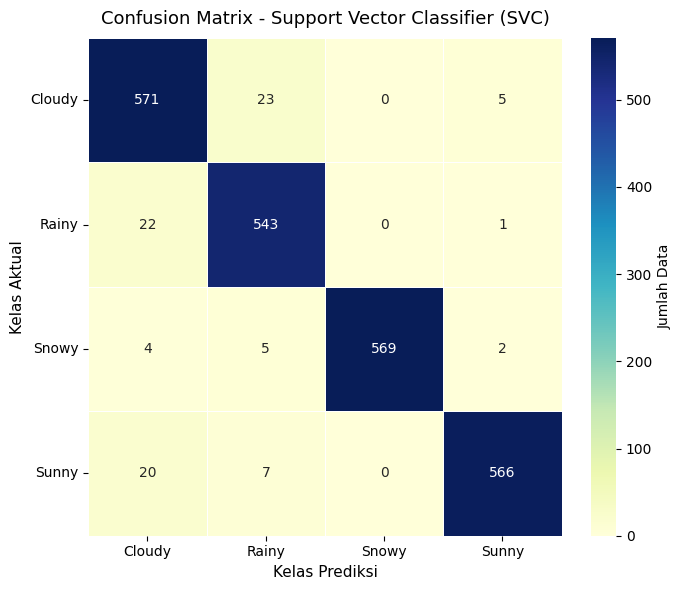

In [35]:
labels = ['Cloudy', 'Rainy', 'Snowy', 'Sunny']

plt.figure(figsize=(7,6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    xticklabels=labels,
    yticklabels=labels,
    linewidths=0.5,
    cbar_kws={'label': 'Jumlah Data'}
)

plt.title('Confusion Matrix - Support Vector Classifier (SVC)', fontsize=13, pad=10)
plt.xlabel('Kelas Prediksi', fontsize=11)
plt.ylabel('Kelas Aktual', fontsize=11)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Visualisasi confusion matrix ini memperlihatkan performa model yang sangat baik, ditandai dengan warna biru tua pekat di sepanjang diagonal yang menunjukkan mayoritas prediksi sudah tepat, sementara warna kuning terang di area lain mengonfirmasi tingkat kesalahan yang sangat rendah.

Model Pembanding (Random Forest)

In [36]:
from sklearn.ensemble import RandomForestClassifier

Akurasi Random Forest: 0.9782

Classification Report:

              precision    recall  f1-score   support

      Cloudy       0.95      0.98      0.96       599
       Rainy       0.98      0.97      0.97       566
       Snowy       1.00      0.99      0.99       580
       Sunny       0.99      0.98      0.98       593

    accuracy                           0.98      2338
   macro avg       0.98      0.98      0.98      2338
weighted avg       0.98      0.98      0.98      2338



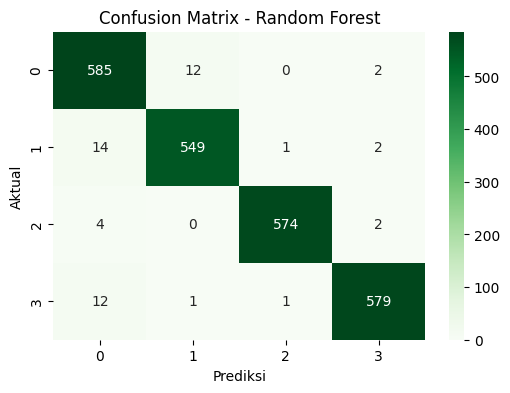

In [37]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Akurasi Random Forest:", round(accuracy_score(y_test, y_pred_rf), 4))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, cmap='Greens', fmt='d')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


Dengan akurasi mencapai 97.8%, model Random Forest menunjukkan performa yang luar biasa, yang juga tercermin pada confusion matrix visualnya di mana diagonal berwarna hijau pekat menandakan prediksi yang sangat akurat dan tingkat kesalahan yang sangat minimal di semua kelas.

A2. Evaluasi Model

In [41]:
akurasi_svc = accuracy_score(y_test, y_pred)
akurasi_rf  = accuracy_score(y_test, y_pred_rf)

print("Akurasi SVC :", round(akurasi_svc, 4))
print("Akurasi RF  :", round(akurasi_rf, 4))

import pandas as pd
eval_df = pd.DataFrame({
    'Model': ['SVC', 'Random Forest'],
    'Accuracy': [akurasi_svc, akurasi_rf]
})
eval_df

Akurasi SVC : 0.9619
Akurasi RF  : 0.9782


,Model,Accuracy
0,SVC,0.961933
1,Random Forest,0.978186


Berdasarkan perbandingan, model Random Forest terbukti lebih unggul dengan akurasi 97.8%, sedikit melampaui model SVC yang mencapai akurasi 96.2%.

A3. Visualisasi Plot

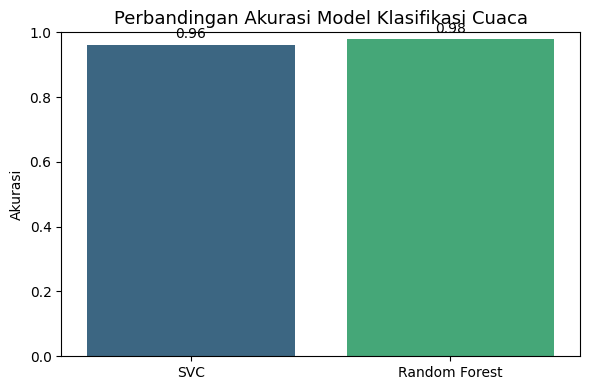

In [44]:
akurasi_data = pd.DataFrame({
    'Model': ['SVC', 'Random Forest'],
    'Akurasi': [akurasi_svc, akurasi_rf]
})

plt.figure(figsize=(6,4))
sns.barplot(
    data=akurasi_data,
    x='Model',
    y='Akurasi',
    hue='Model',
    palette='viridis',
    legend=False
)
plt.title('Perbandingan Akurasi Model Klasifikasi Cuaca', fontsize=13)
plt.ylim(0, 1)
for i, v in enumerate(akurasi_data['Akurasi']):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
plt.ylabel('Akurasi')
plt.xlabel('')
plt.tight_layout()
plt.show()

Grafik perbandingan ini secara visual menunjukkan bahwa model Random Forest (98%) memiliki akurasi yang sedikit lebih unggul dibandingkan model SVC (96%) untuk klasifikasi cuaca.

Plot titik-titik hasil prediksi nilai pada target, beserta dengan titik-titik target aslinya.

In [45]:
from sklearn.decomposition import PCA

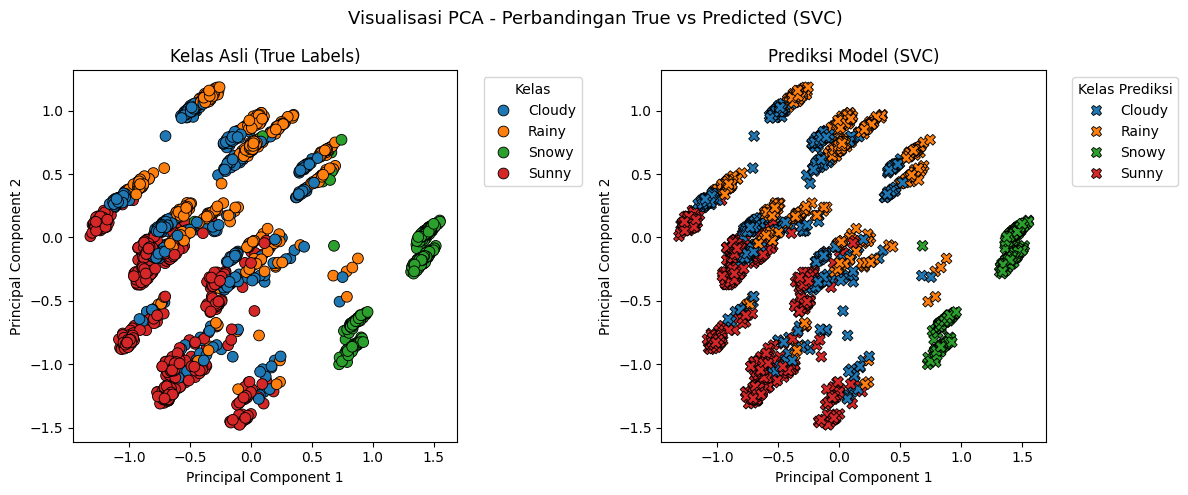

In [52]:
class_names = ['Cloudy', 'Rainy', 'Snowy', 'Sunny']

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_test)

pca_df_true = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Label': y_test
})

pca_df_pred = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Label': y_pred
})

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(
    data=pca_df_true,
    x='PC1', y='PC2',
    hue='Label',
    palette='tab10',
    s=60,
    edgecolor='black'
)
plt.title("Kelas Asli (True Labels)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Kelas', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(1,2,2)
sns.scatterplot(
    data=pca_df_pred,
    x='PC1', y='PC2',
    hue='Label',
    palette='tab10',
    s=60,
    marker='X',
    edgecolor='black'
)
plt.title("Prediksi Model (SVC)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Kelas Prediksi', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.suptitle("Visualisasi PCA - Perbandingan True vs Predicted (SVC)", fontsize=13)
plt.tight_layout()
plt.show()

**Kesimpulan Visualisasi PCA**

Visualisasi PCA (Principal Component Analysis) ini menampilkan perbandingan antara kelas cuaca asli (True Labels) dan prediksi model SVC pada data uji yang telah direduksi dimensinya menjadi 2 komponen utama.

* **Plot Kiri (Kelas Asli):** Menunjukkan sebaran data uji berdasarkan kelas cuaca yang sebenarnya. Terlihat adanya beberapa tumpang tindih antar kelas, terutama antara 'Cloudy' dan 'Rainy', serta 'Snowy' dan 'Sunny'.
* **Plot Kanan (Prediksi Model SVC):** Menunjukkan sebaran data uji berdasarkan prediksi yang dihasilkan oleh model SVC. Pola sebarannya sangat mirip dengan plot kelas asli, menunjukkan bahwa model SVC mampu mengklasifikasikan sebagian besar data dengan benar. Namun, terlihat beberapa titik prediksi (ditandai dengan 'X') yang berada di area kelas yang berbeda dari kelas aslinya, yang merepresentasikan kesalahan klasifikasi.

Secara keseluruhan, visualisasi ini mengkonfirmasi bahwa model SVC memiliki kinerja yang baik dalam membedakan kelas-kelas cuaca, meskipun ada beberapa area di mana kelas-kelas tersebut saling berdekatan dan menyebabkan potensi kesalahan prediksi.